## René Parlange, MSc
### 📚 Gravitational Lensing Course, PhD in Computer Science
#### 🎓 Instructors: *Dr*. Octavio Valenzuela (IA-UNAM), Dr. Juan Carlos Cuevas (UASLP) and Dr. Omar Cabrera (IA-UNAM)
#### 🏛 Universidad Autónoma de San Luis Potosí (UASLP)

🔗 [GitHub Repository](https://github.com/parlange/gravitational-lensing)



In our first python application, we write a script to produce Fig. 2.3. A brief python
tutorial can be found in Appendix 8.
We need to implement Eqs. 2.40 and 2.42. Then, we **compare the resulting
deflection angle to that in the weak field limit** described by Eq. 2.37.
We start by importing some useful packages:

In [ ]:
from scipy import special as sy # need special functions for incomplete \\
# elliptic integrals of the first kind
import numpy as np # efficient vector and matrix operations
import matplotlib.pyplot as plt # a MATLAB-like plotting framework

We import the module special from the package scipy in order to compute
the elliptic integral of the first kind in Eq. 2.42. See https://docs.scipy.org/doc/scipy/
reference/special.html

Our goal is to produce a graph. We setup the fonts and the character size, and
then we import the **matplotlib** library. We will use this library extensively for
visualization purposes in this book. In particular, we will often use the MATLABlike plotting framework provided by matplotlib.pyplot:

In [ ]:
font = {'family' : 'normal',
'weight' : 'normal',
'size' : 20}
import matplotlib
matplotlib.rc('font', **font)
import matplotlib.pyplot as plt

When it is convenient, we will also adopt an **object-oriented programming** style,
using classes to define objects. For example, we can create a class for black hole
objects as follows:

In [ ]:
class point_bh:
    def __init__(self,M):
        self.M=M

    # functions defining the metric.
    def A(self,r):
        return(1.0-2.0*self.M/r)

    def B(self,r):
        return (self.A(r)**(-1))

    def C(self,r):
        return(r**2)

    # compute u from rm
    def u(self,r):
        u=np.sqrt(self.C(r)/self.A(r))
        return(u)

    # functions concurring to the deflection angle calculation
    def ss(self,r):
        return(np.sqrt((r-2.0*self.M)*(r+6.0*self.M)))

    def mm(self,r,s):
        return((s-r+6.0*self.M)/2/s)

    def phif(self,r,s):
        return(np.arcsin(np.sqrt(2.0*s/(3.0*r-6.0*self.M+s))))

    # the deflection angle
    def defAngle(self,r):
        s=self.ss(r)
        m=self.mm(r,s)
        phi=self.phif(r,s)
        F=sy.ellipkinc(phi, m) # using the ellipkinc function
                              # from scipy.special
        return(-np.pi+4.0*np.sqrt(r/s)*F)

A black-hole object is an instance of the **class point_bh**. The only input
parameter required to initialize the object (see the _ _init_ _) is the black-hole
mass. The class contains several methods (or functions), which will be used to
compute the black-hole deflection angle.

For example, it contains the functions
$A(R)$, $B(R)$, and $C(R)$. We use them to convert the minimal distance **$R_m$** to **$u$**. It also
contains the functions for computing **s** , **m** , **ϕ**, which depend on the black-hole mass
and the minimal distance **$R_m$**.

Finally, the function **defAngle** enables to compute the deflection angle using Eq. 2.42. This function uses the method elipkinc from
scipy.special to compute the incomplete elliptic integral of the first kind,
**F (ϕ, m)**.

Note that ϕ and m are numpy arrays not scalars, i.e. elipkinc returns
the integral for several values of (ϕ, m) with a single call.

Following the same approach, we build another class which deals with point
lenses in the weak field limit, i.e. it implements Eq. 2.37:

In [ ]:
class point_mass:
    def __init__(self,M):
        self.M=M

    # the classical formula
    def defAngle(self,u):
        return(4.0*self.M/u)

We can now use the two classes above to build two objects, namely a **black-hole
lens** and a **point-mass lens**. In both cases, the mass of the lens is fixed to 3$M_{\odot}$. For
a mass of this size, the Schwarzschild radius is $R_s$ ∼ 9km:




In [ ]:
bh=point_bh(3.0)
pm=point_mass(3.0)

We use the **linspace** method from the package numpy to initialize an array
of minimal distances $R_m$, which we use to compute alpha hat. We use the function $u(r)$
of **point_bh** to convert $R_m$ into an array of impact parameters $u$:


In [ ]:
r=np.linspace(3.0/2.0,10,1000)*2.0*bh.M
u=bh.u(r)/2.0/bh.M

The deflection angle as a function of **u** or **$R_m:$** can be computed in the cases of
the exact solution and in the weak field limit using the method **defAngle** applied
to **bh** and **pm**:

In [ ]:
a=bh.defAngle(r)
b=pm.defAngle(u*2.0*bh.M)

Note that $u$ is in units of the Schwarzschild radius and we assume **G/c2 = 1**.
For displaying the results, we use the following code:


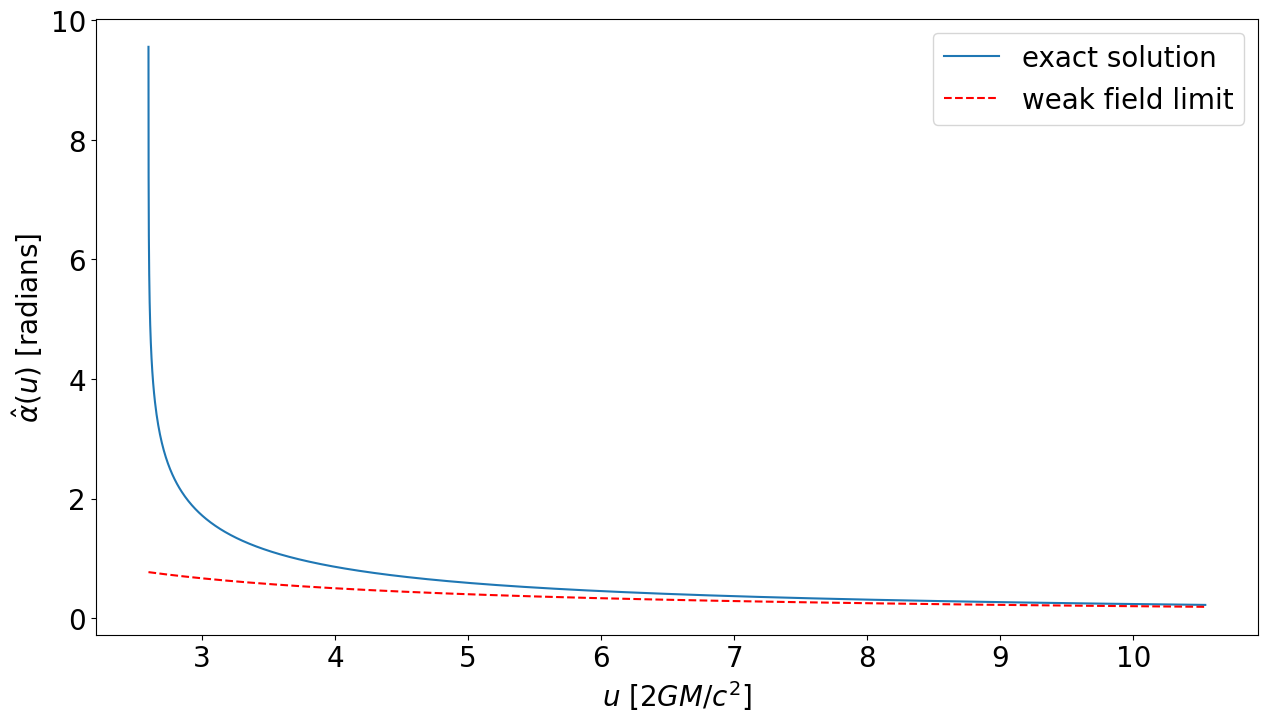

In [ ]:
# initialize figure and axes
# (single plot, 15" by 8" in size)
fig,ax=plt.subplots(1,1,figsize=(15,8))
# plot the exact solution in ax
ax.plot(u,a,'-',label='exact solution')
# plot the solution in the weak field limit
ax.plot(u,b,'--',label='weak field limit',color='red')
# set the labels for the x and the y axes
ax.set_xlabel(r'$u$ $[2GM/c^2]$')
ax.set_ylabel(r'$\hat\alpha(u)$ [radians]')
# add the legend
ax.legend()

We also want to show the **vertical asymptote** at $u_{lim}$ = $\frac{3\sqrt{3}}{2}$:

In [ ]:
# plot a vertical dotted line at u=3\sqrt(3)/2
x=[np.min(u),np.min(u)]
y=[0,10]
ax.plot(x,y,':')

To conclude, we save the figure in a .png file:

In [ ]:
# save figure in png format
fig.savefig('bhalpha.png')